<a href="https://colab.research.google.com/github/tech-dhawal-03/cognifyzInternAchent/blob/main/level2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Most common price range: 1


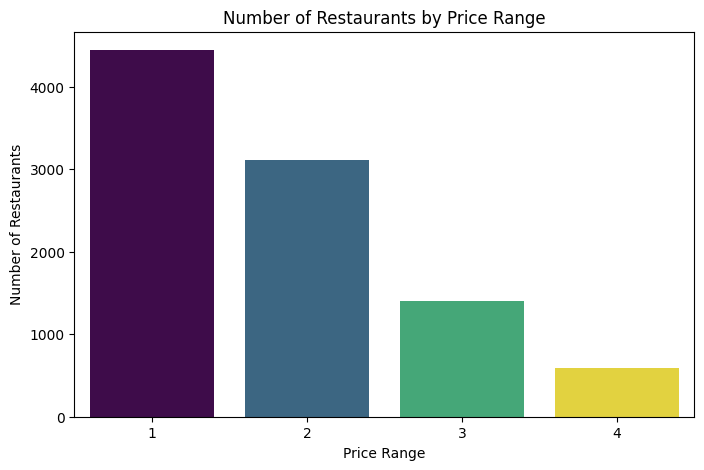


Average rating for each price range:
 Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


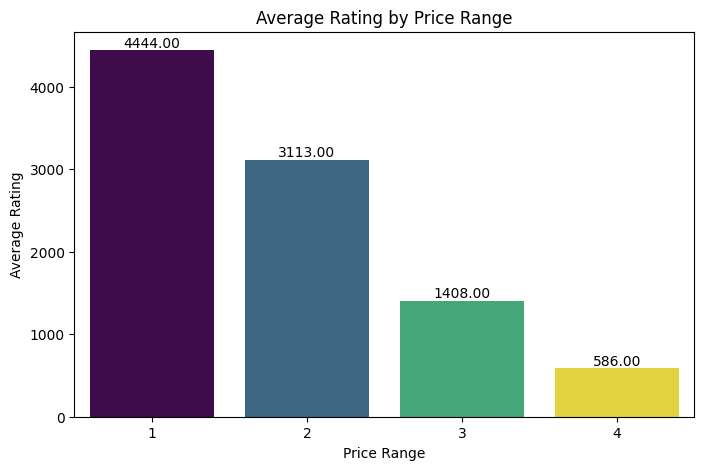


Average Rating by Color:
 Rating color
Dark Green    4.659801
Green         4.168119
Yellow        3.683429
Orange        3.051619
Red           2.297849
White         0.000000
Name: Aggregate rating, dtype: float64

Color representing the highest average rating: Dark Green


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset .csv')

# -------------------------------
# 1. Most Common Price Range
# -------------------------------
most_common_price_range = df['Price range'].mode()[0]
print(f"Most common price range: {most_common_price_range}")

price_range_counts = df['Price range'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, hue=price_range_counts.index, palette='viridis', dodge=False, legend=False)
plt.title('Number of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

# -------------------------------
# 2. Average Rating for Each Price Range
# -------------------------------
avg_rating_per_range = df.groupby('Price range')['Aggregate rating'].mean().sort_index()
print("\nAverage rating for each price range:\n", avg_rating_per_range)

plt.figure(figsize=(8,5))
bar = sns.barplot(x=price_range_counts.index, y=price_range_counts.values, hue=price_range_counts.index, palette='viridis', dodge=False, legend=False)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')

# Annotate bars with rating values
for p in bar.patches:
    bar.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.show()

# -------------------------------
# 3. Color Representing Highest Rated Price Range
# -------------------------------
# If color info is available (usually a column like 'Rating color'), find highest rated one
if 'Rating color' in df.columns:
    avg_rating_by_color = df.groupby('Rating color')['Aggregate rating'].mean().sort_values(ascending=False)
    print("\nAverage Rating by Color:\n", avg_rating_by_color)
    highest_rated_color = avg_rating_by_color.idxmax()
    print(f"\nColor representing the highest average rating: {highest_rated_color}")
else:
    print("\nColumn 'Rating color' not found in dataset.")
